#### Final Project

#### MIS-64018-003

#### Group 9


In [ ]:
#!pip install docplex
#!pip install cplex

In [47]:
from google.colab import files
from IPython import display
import numpy as np
from docplex.mp.model import Model

###1. Problem Statement: 

#####The purpose of this project is to assign students to a group to maximize success. Each student has different characteritics about them making their own success rates different. The code below will optimize how to assign students to each of the 4 group maximizing (balancing) the success rates for each group. Details are explained further throughout.  

###2. Data Collection & Overview

In [ ]:
uploaded = files.upload()   #used to initially choose picture

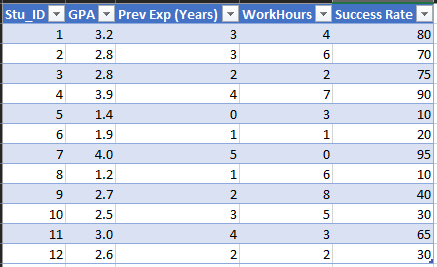

In [49]:
display.Image('Dataset.PNG')

#### Initial Data Set

#####GPA: The higher the GPA, the more likely the student will have a higher chance of success

#####Previous Years of ExP (years): The more years of experience the student has, the higher chance of success the student will have

#####Work Hours/day: The more Work Hours per day the students does, the lower chance of success the student will have

#####Success Rate: This success rate is assigned to each student. This Success Rate has been given to each student based on a combination of their GPA, previous years of experience and their work hours. 

In [ ]:
uploaded = files.upload()

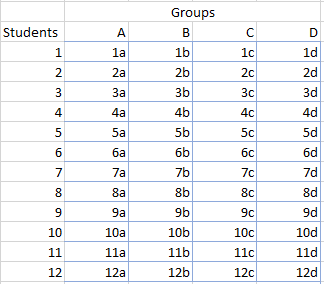

In [51]:
display.Image('Decision_Variables.PNG')

#### Decision Variables

#####Explanation: For each row of students they will be assigned to a group. Each group must have 3 students and each student must be assigned to a group 

#####Example of how the variables will work: If student 1 were to be assigned to Group 3, 1c will be 1 and 1a, 1b, and 1d will be 0. This is because the same student can only be in 1 seat among the 4 different groups. 

###3. Method Used

#### Please refer to the above decision variables picture to understand the methodology given. Imagine each variable (1a, 1b, etc) in the image above as a seat. Given the table we setup each variable to be either a 0 or 1. 0 meaning there is no one in that seat, 1 meaning that student in that row is sitting in that seat for that group. So if student 9 is sitting in seat 11b then Group B will gain 40 success rate points. 

#### We will be using the Docplex library to find a solution

### Setting up Variables#

In [52]:
m = Model(name = "Student_Model")

Assignment1a = m.integer_var(name='Assignment1a', lb = 0, ub=1)
Assignment2a = m.integer_var(name='Assignment2a', lb = 0, ub=1)
Assignment3a = m.integer_var(name='Assignment3a', lb = 0, ub=1)
Assignment4a = m.integer_var(name='Assignment4a', lb = 0, ub=1)
Assignment5a = m.integer_var(name='Assignment5a', lb = 0, ub=1)
Assignment6a = m.integer_var(name='Assignment6a', lb = 0, ub=1)
Assignment7a = m.integer_var(name='Assignment7a', lb = 0, ub=1)
Assignment8a = m.integer_var(name='Assignment8a', lb = 0, ub=1)
Assignment9a = m.integer_var(name='Assignment9a', lb = 0, ub=1)
Assignment10a = m.integer_var(name='Assignment10a', lb = 0, ub=1)
Assignment11a = m.integer_var(name='Assignment11a', lb = 0, ub=1)
Assignment12a = m.integer_var(name='Assignment12a', lb = 0, ub=1)
Assignment1b = m.integer_var(name='Assignment1b', lb = 0, ub=1)
Assignment2b = m.integer_var(name='Assignment2b', lb = 0, ub=1)
Assignment3b = m.integer_var(name='Assignment3b', lb = 0, ub=1)
Assignment4b = m.integer_var(name='Assignment4b', lb = 0, ub=1)
Assignment5b = m.integer_var(name='Assignment5b', lb = 0, ub=1)
Assignment6b = m.integer_var(name='Assignment6b', lb = 0, ub=1)
Assignment7b = m.integer_var(name='Assignment7b', lb = 0, ub=1)
Assignment8b = m.integer_var(name='Assignment8b', lb = 0, ub=1)
Assignment9b = m.integer_var(name='Assignment9b', lb = 0, ub=1)
Assignment10b = m.integer_var(name='Assignment10b', lb = 0, ub=1)
Assignment11b = m.integer_var(name='Assignment11b', lb = 0, ub=1)
Assignment12b = m.integer_var(name='Assignment12b', lb = 0, ub=1)
Assignment1c = m.integer_var(name='Assignment1c', lb = 0, ub=1)
Assignment2c = m.integer_var(name='Assignment2c', lb = 0, ub=1)
Assignment3c = m.integer_var(name='Assignment3c', lb = 0, ub=1)
Assignment4c = m.integer_var(name='Assignment4c', lb = 0, ub=1)
Assignment5c = m.integer_var(name='Assignment5c', lb = 0, ub=1)
Assignment6c = m.integer_var(name='Assignment6c', lb = 0, ub=1)
Assignment7c = m.integer_var(name='Assignment7c', lb = 0, ub=1)
Assignment8c = m.integer_var(name='Assignment8c', lb = 0, ub=1)
Assignment9c = m.integer_var(name='Assignment9c', lb = 0, ub=1)
Assignment10c = m.integer_var(name='Assignment10c', lb = 0, ub=1)
Assignment11c = m.integer_var(name='Assignment11c', lb = 0, ub=1)
Assignment12c = m.integer_var(name='Assignment12c', lb = 0, ub=1)
Assignment1d = m.integer_var(name='Assignment1d', lb = 0, ub=1)
Assignment2d = m.integer_var(name='Assignment2d', lb = 0, ub=1)
Assignment3d = m.integer_var(name='Assignment3d', lb = 0, ub=1)
Assignment4d = m.integer_var(name='Assignment4d', lb = 0, ub=1)
Assignment5d = m.integer_var(name='Assignment5d', lb = 0, ub=1)
Assignment6d = m.integer_var(name='Assignment6d', lb = 0, ub=1)
Assignment7d = m.integer_var(name='Assignment7d', lb = 0, ub=1)
Assignment8d = m.integer_var(name='Assignment8d', lb = 0, ub=1)
Assignment9d = m.integer_var(name='Assignment9d', lb = 0, ub=1)
Assignment10d = m.integer_var(name='Assignment10d', lb = 0, ub=1)
Assignment11d = m.integer_var(name='Assignment11d', lb = 0, ub=1)
Assignment12d = m.integer_var(name='Assignment12d', lb = 0, ub=1)

Total_Group_Sr = 150   #This will be used to balance the success rate per group
                       #Can be adjusted based on how balanced we want the groups

Student1_sr = 80
Student2_sr = 70
Student3_sr = 75
Student4_sr = 90
Student5_sr = 10
Student6_sr = 20
Student7_sr = 95
Student8_sr = 10
Student9_sr = 40
Student10_sr = 30
Student11_sr = 65
Student12_sr = 30


#### Setting up Constraints

In [53]:
#Ensuring there are only 3 students per group
group1_count_constraint = m.add_constraint(Assignment1a + Assignment2a + Assignment3a + Assignment4a + Assignment5a + Assignment6a + \
                                           Assignment7a + Assignment8a + Assignment9a + Assignment10a + Assignment11a + Assignment12a == 3)
group2_count_constraint = m.add_constraint(Assignment1b + Assignment2b + Assignment3b + Assignment4b + Assignment5b + Assignment6b + \
                                           Assignment7b + Assignment8b + Assignment9b + Assignment10b + Assignment11b + Assignment12b == 3)
group3_count_constraint = m.add_constraint(Assignment1c + Assignment2c + Assignment3c + Assignment4c + Assignment5c + Assignment6c + \
                                           Assignment7c + Assignment8c + Assignment9c + Assignment10c + Assignment11c + Assignment12c == 3)
group4_count_constraint = m.add_constraint(Assignment1d + Assignment2d + Assignment3d + Assignment4d + Assignment5d + Assignment6d + \
                                           Assignment7d + Assignment8d + Assignment9d + Assignment10d + Assignment11d + Assignment12d == 3)

#Ensuring a student only belongs to 1 group
Student1_constraint = m.add_constraint(Assignment1a + Assignment1b + Assignment1c + Assignment1d == 1)
Student2_constraint = m.add_constraint(Assignment2a + Assignment2b + Assignment2c + Assignment2d == 1)
Student3_constraint = m.add_constraint(Assignment3a + Assignment3b + Assignment3c + Assignment3d == 1)
Student4_constraint = m.add_constraint(Assignment4a + Assignment4b + Assignment4c + Assignment4d == 1)
Student5_constraint = m.add_constraint(Assignment5a + Assignment5b + Assignment5c + Assignment5d == 1)
Student6_constraint = m.add_constraint(Assignment6a + Assignment6b + Assignment6c + Assignment6d == 1)
Student7_constraint = m.add_constraint(Assignment7a + Assignment7b + Assignment7c + Assignment7d == 1)
Student8_constraint = m.add_constraint(Assignment8a + Assignment8b + Assignment8c + Assignment8d == 1)
Student9_constraint = m.add_constraint(Assignment9a + Assignment9b + Assignment9c + Assignment9d == 1)
Student10_constraint = m.add_constraint(Assignment10a + Assignment10b + Assignment10c + Assignment10d == 1)
Student11_constraint = m.add_constraint(Assignment11a + Assignment11b + Assignment11c + Assignment11d == 1)
Student12_constraint = m.add_constraint(Assignment12a + Assignment12b + Assignment12c + Assignment12d == 1)


#Ensuring the groups are balanced. These can be changed as the rules/requirement change
Group_1_Threshold_constraint = m.add_constraint(Assignment1a*Student1_sr + Assignment2a*Student2_sr + Assignment3a*Student3_sr + Assignment4a*Student4_sr\
    + Assignment5a*Student5_sr + Assignment6a*Student6_sr + Assignment7a*Student7_sr + Assignment8a*Student8_sr\
    + Assignment9a*Student9_sr + Assignment10a*Student10_sr + Assignment11a*Student11_sr + Assignment12a*Student12_sr >= Total_Group_Sr)

Group_2_Threshold_constraint = m.add_constraint(Assignment1b*Student1_sr + Assignment2b*Student2_sr + Assignment3b*Student3_sr + Assignment4b*Student4_sr\
    + Assignment5b*Student5_sr + Assignment6b*Student6_sr + Assignment7b*Student7_sr + Assignment8b*Student8_sr\
    + Assignment9b*Student9_sr + Assignment10b*Student10_sr + Assignment11b*Student11_sr + Assignment12b*Student12_sr >= Total_Group_Sr)

Group_3_Threshold_constraint = m.add_constraint(Assignment1c*Student1_sr + Assignment2c*Student2_sr + Assignment3c*Student3_sr + Assignment4c*Student4_sr\
    + Assignment5c*Student5_sr + Assignment6c*Student6_sr + Assignment7c*Student7_sr + Assignment8c*Student8_sr\
    + Assignment9c*Student9_sr + Assignment10c*Student10_sr + Assignment11c*Student11_sr + Assignment12c*Student12_sr >= Total_Group_Sr)

Group_4_Threshold_constraint = m.add_constraint(Assignment1d*Student1_sr + Assignment2d*Student2_sr + Assignment3d*Student3_sr + Assignment4d*Student4_sr\
    + Assignment5d*Student5_sr + Assignment6d*Student6_sr + Assignment7d*Student7_sr + Assignment8d*Student8_sr\
    + Assignment9d*Student9_sr + Assignment10d*Student10_sr + Assignment11d*Student11_sr + Assignment12d*Student12_sr >= Total_Group_Sr)

#### Objective Function

In [54]:
m.maximize(
(Assignment1a*Student1_sr + Assignment2a*Student2_sr + Assignment3a*Student3_sr + Assignment4a*Student4_sr\
    + Assignment5a*Student5_sr + Assignment6a*Student6_sr + Assignment7a*Student7_sr + Assignment8a*Student8_sr\
    + Assignment9a*Student9_sr + Assignment10a*Student10_sr + Assignment11a*Student11_sr + Assignment12a*Student12_sr) +
(Assignment1b*Student1_sr + Assignment2b*Student2_sr + Assignment3b*Student3_sr + Assignment4b*Student4_sr\
    + Assignment5b*Student5_sr + Assignment6b*Student6_sr + Assignment7b*Student7_sr + Assignment8b*Student8_sr\
    + Assignment9b*Student9_sr + Assignment10b*Student10_sr + Assignment11b*Student11_sr + Assignment12b*Student12_sr) +
(Assignment1c*Student1_sr + Assignment2c*Student2_sr + Assignment3c*Student3_sr + Assignment4c*Student4_sr\
    + Assignment5c*Student5_sr + Assignment6c*Student6_sr + Assignment7c*Student7_sr + Assignment8c*Student8_sr\
    + Assignment9c*Student9_sr + Assignment10c*Student10_sr + Assignment11c*Student11_sr + Assignment12c*Student12_sr) +
(Assignment1d*Student1_sr + Assignment2d*Student2_sr + Assignment3d*Student3_sr + Assignment4d*Student4_sr\
    + Assignment5d*Student5_sr + Assignment6d*Student6_sr + Assignment7d*Student7_sr + Assignment8d*Student8_sr\
    + Assignment9d*Student9_sr + Assignment10d*Student10_sr + Assignment11d*Student11_sr + Assignment12d*Student12_sr)
)

###4. Solution:

#### Display Results

In [55]:
sol = m.solve()

sol.display()

solution for: Student_Model
objective: 615
status: OPTIMAL_SOLUTION(2)
Assignment6a = 1
Assignment7a = 1
Assignment9a = 1
Assignment3b = 1
Assignment8b = 1
Assignment11b = 1
Assignment1c = 1
Assignment2c = 1
Assignment5c = 1
Assignment4d = 1
Assignment10d = 1
Assignment12d = 1


##### Here above we can see which students are being selected per group. For group A students 6, 7, & 9 were selected. For Group B students 3, 8 & 11 were selcted and so on. 

#### Here we can see which students are being chosen per group. Refer to the image below for a better understanding. 

In [ ]:
uploaded = files.upload()

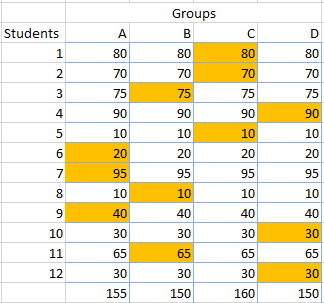

In [61]:
display.Image('Sol.PNG')

##### From the optimal solution above we can refer back to our student table to visually see which students were picked and the total success rate per group. (Highlighted cells are students that were selected for that group)

##### GroupA = 155
##### GroupB = 150
##### GroupC = 160
##### GroupD = 150

##### We can see here that the success rate for each group is optimally balanced. If we were to attempt to increase the success rate threshold to 155 it would result in an error because there is no better solution. 